# 선형판별분석(Linear Discrimination Analysis) 예제

참고 : https://velog.io/@sset2323/06-03.-LDALinear-Discriminant-Analysis

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [4]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

lda_cols = ['lda_1', 'lda_2']
iris_lda = pd.DataFrame(iris_lda, columns = lda_cols)
iris_lda['target'] = iris.target

In [5]:
iris_lda

,lda_1,lda_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


이렇게 2개의 축을 기준으로 사영시켰음을 확인할 수 있다.

2개의 축이 기준이 된 사영 결과를 살펴보면 다음과 같다.

<AxesSubplot:xlabel='lda_1', ylabel='lda_2'>

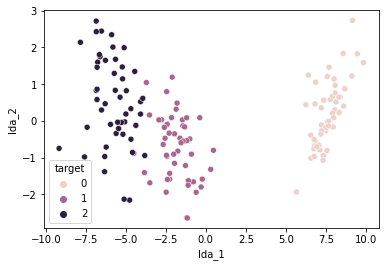

In [13]:
sns.scatterplot(x = 'lda_1', y = 'lda_2', data = iris_lda, hue = 'target')

이렇게 3개로 잘 나누어져있음을 확인했다. 그러면, 1개라면 어떻게 될까?

In [14]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

lda_cols = ['lda_1']
iris_lda_one = pd.DataFrame(iris_lda, columns = lda_cols)
iris_lda_one['target'] = iris.target

In [15]:
iris_lda_one

,lda_1,target
0,8.061800,0
1,7.128688,0
2,7.489828,0
3,6.813201,0
4,8.132309,0
...,...,...
145,-5.645003,2
146,-5.179565,2
147,-4.967741,2
148,-5.886145,2


In [18]:
iris_lda_one['lda_1'].groupby(iris_lda_one.target).min()

target
0    5.661881
1   -4.498466
2   -9.171475
Name: lda_1, dtype: float64

In [19]:
iris_lda_one['lda_1'].groupby(iris_lda_one.target).max()

target
0    9.849843
1    0.475974
2   -3.815160
Name: lda_1, dtype: float64

min과 max를 보면 target 0에 대해서는 잘 분리되었음을 알 수 있다.
-4~-3 정도 대에서 target 1, 2가 혼종되어있음을 알 수 있다.